In [ ]:
!pip install "sb3_contrib>=2.0.0a1" --upgrade
!pip install "stable_baselines3>=2.0.0a1" --upgrade
!pip install pvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.8/181.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 46.2 MB/s eta 0:00:00


## Download the folder "BEAR" and upload it to your Drive in "My Drive", then run the cells

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
cwd = os.getcwd()

os.chdir("gdrive/My Drive")

Mounted at /content/gdrive


In [ ]:
from BEAR.Env.env_building  import BuildingEnvReal
from BEAR.Controller.MPC_Controller import MPCAgent
from BEAR.Utils.utils_building import ParameterGenerator,get_user_input
import numpy as np
import functools
import datetime
import os
import time
from collections import deque
import matplotlib.pyplot as plt

###Violin Plot

In [ ]:
from stable_baselines3 import PPO ,DQN,DDPG,A2C,SAC
from stable_baselines3.common.logger import configure
from stable_baselines3.ppo import MlpPolicy
# from stable_baselines.bench import Monitor
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.env_util import make_vec_env

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Test with continuous action space:

In [ ]:
Parameter=ParameterGenerator('OfficeSmall','Hot_Dry','Tucson',time_reso=300,root='BEAR/Data/')  #Description of ParameterGenerator in bldg_utils.py
#Create environment
env = BuildingEnvReal(Parameter)
numofhours=24
#Initialize
env.reset()
for i in range(numofhours):
    a = env.action_space.sample()#Randomly select an action
    obs, r, terminated, truncated, _ = env.step(a)#Return observation and reward
RandomController_state=env.statelist #Collect the state list
RandomController_action=env.actionlist #Collect the action list

###############All Zones from Ground############
CORE_ZN  [Zone index]:  0
PERIMETER_ZN_1  [Zone index]:  1
PERIMETER_ZN_2  [Zone index]:  2
PERIMETER_ZN_3  [Zone index]:  3
PERIMETER_ZN_4  [Zone index]:  4
ATTIC  [Zone index]:  5
###################################################


In [ ]:
rwlistsac=[]
sacstr=[]
model = SAC("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
model = SAC.load("BEAR/Model/SAC_winter0")
obs = vec_env.reset()

#Winter Test
#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)
#Then loop a month's testing data
for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  sacstr.append('Winter')
  rwlistsac.append(rw)

#Summer Test
env.reset()
model = SAC("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
model = SAC.load("BEAR/Model/SAC_summer0")
obs = vec_env.reset()

#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)

for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  sacstr.append('Summer')
  rwlistsac.append(rw)

串流輸出內容已截斷至最後 5000 行。
[-6.040471]
[-6.453421]
[-5.8127027]
[-5.8370943]
[-5.321001]
[-4.8034444]
[-5.4438963]
[-5.467281]
[-5.6304364]
[-5.721914]
[-5.6890626]
[-5.5470943]
[-5.2243114]
[-5.845643]
[-5.4357615]
[-5.182701]
[-5.4969974]
[-5.41474]
[-5.931075]
[-6.094419]
[-5.138188]
[-5.4215517]
[-5.7745695]
[-5.415171]
[-5.600039]
[-5.5680375]
[-4.8835535]
[-5.905351]
[-5.172207]
[-4.7873716]
[-5.0033045]
[-4.8027754]
[-5.505368]
[-5.32088]
[-5.6750712]
[-5.141261]
[-5.6681857]
[-6.204501]
[-6.4136367]
[-5.128394]
[-6.2383504]
[-6.3637614]
[-5.916694]
[-5.4969406]
[-5.8782144]
[-6.0073767]
[-6.4447064]
[-5.371602]
[-5.9950647]
[-6.2610464]
[-5.4543834]
[-5.970658]
[-5.757139]
[-5.1070523]
[-5.3694816]
[-6.008191]
[-6.2373977]
[-5.9786315]
[-5.979578]
[-4.3977747]
[-5.6053486]
[-5.8475127]
[-5.437076]
[-6.803152]
[-5.0900865]
[-5.456295]
[-5.293882]
[-5.299384]
[-5.6725225]
[-6.1553564]
[-5.5583367]
[-6.2160215]
[-5.368899]
[-5.889578]
[-5.864557]
[-4.9305573]
[-6.0342526]
[-5.3380127]
[

In [ ]:
rwlistppo=[]
model = PPO("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
# model = PPO.load("Model/PPO_cont3")
model = PPO.load("BEAR/Model/PPO_winter0")
obs = vec_env.reset()

#Winter Test
#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)
#Then loop a month's testing data
for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  rwlistppo.append(rw)

#Summer Test
env.reset()
model = PPO("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
model = PPO.load("BEAR/Model/PPO_summer0")
obs = vec_env.reset()

#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)

for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  rwlistppo.append(rw)

串流輸出內容已截斷至最後 5000 行。
[-5.556781]
[-5.2892056]
[-5.64727]
[-5.9156914]
[-5.5912805]
[-5.7179246]
[-5.692778]
[-5.703739]
[-5.8191185]
[-6.076391]
[-5.7802258]
[-5.4822507]
[-5.6036415]
[-5.524538]
[-5.962606]
[-5.8303094]
[-5.609108]
[-5.6755905]
[-5.664505]
[-5.7436304]
[-5.4461265]
[-5.830059]
[-5.7893553]
[-5.5677657]
[-5.6005883]
[-5.763116]
[-5.9848604]
[-5.8679276]
[-5.688246]
[-5.63206]
[-5.8787193]
[-5.690502]
[-5.7904987]
[-5.740961]
[-5.663798]
[-5.639751]
[-6.1411376]
[-5.8431287]
[-5.9404545]
[-5.743862]
[-5.585774]
[-5.782825]
[-5.7368417]
[-5.8682823]
[-5.94674]
[-5.7953405]
[-5.9495616]
[-5.8239436]
[-6.0657644]
[-5.869622]
[-6.147695]
[-5.845753]
[-5.883635]
[-5.72944]
[-5.803136]
[-5.639485]
[-5.498305]
[-5.8685193]
[-6.1478586]
[-6.3734694]
[-6.4195127]
[-6.462633]
[-6.535969]
[-5.93722]
[-6.0412965]
[-5.711132]
[-5.820579]
[-5.7108965]
[-5.739286]
[-5.866463]
[-5.8736577]
[-5.996737]
[-5.6724305]
[-5.740967]
[-5.7042055]
[-6.128729]
[-6.313488]
[-6.184882]
[-6.3555026

In [ ]:
rwlista2c=[]
model = A2C("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
# model = PPO.load("Model/PPO5")
model = A2C.load("BEAR/Model/A2C_winter0")
obs = vec_env.reset()

#Winter Test
#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)
#Then loop a month's testing data
for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  rwlista2c.append(rw)

#Summer Test
env.reset()
model = A2C("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
model = A2C.load("BEAR/Model/A2C_summer0")
obs = vec_env.reset()

#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)

for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  rwlista2c.append(rw)

串流輸出內容已截斷至最後 5000 行。
[-6.232969]
[-6.493279]
[-7.257016]
[-5.6366873]
[-5.1691155]
[-8.221219]
[-5.6846304]
[-6.7628593]
[-7.1607614]
[-7.0564823]
[-7.0101566]
[-6.580042]
[-5.258018]
[-7.5491476]
[-8.279882]
[-5.963431]
[-7.253543]
[-7.0997443]
[-6.998651]
[-6.6954885]
[-7.762411]
[-6.6971836]
[-6.170895]
[-6.6087575]
[-6.139984]
[-6.3840265]
[-8.031966]
[-7.8515096]
[-6.888121]
[-7.6770215]
[-7.378712]
[-8.725501]
[-8.677726]
[-7.242956]
[-5.912246]
[-7.1170306]
[-8.413451]
[-5.9622154]
[-7.4801874]
[-7.1407466]
[-7.397424]
[-7.864445]
[-7.578707]
[-8.262265]
[-7.3503404]
[-8.720921]
[-9.040337]
[-6.914365]
[-8.070984]
[-8.706011]
[-8.335999]
[-10.013794]
[-8.91605]
[-9.546818]
[-9.356196]
[-8.390839]
[-8.654331]
[-9.215124]
[-9.570097]
[-9.3533535]
[-7.5342712]
[-8.426226]
[-9.7008705]
[-11.252912]
[-9.443181]
[-9.2349205]
[-9.269304]
[-10.186452]
[-8.168316]
[-9.393944]
[-10.343467]
[-9.501817]
[-8.937975]
[-9.006725]
[-9.0118065]
[-9.886931]
[-10.90339]
[-11.701313]
[-11.254993]
[

In [ ]:
env.reset()
rwlistmpc=[]
mpcstr=[]
agent = MPCAgent(env,
                gamma=env.gamma,
                safety_margin=0.96, planning_steps=10)

for k in range(30*288):
  action, _states = agent.predict(env)
  obs, rewards, terminated, truncated, info = env.step(action)




for i in range(30):
  rw=0
  print('looop:',i)
  for j in range(288):
    action, _states = agent.predict(env)
    obs, rewards, terminated, truncated, info = env.step(action)
    rw+=rewards
  rwlistmpc.append(rw)
  mpcstr.append('Winter')


looop: 0
looop: 1
looop: 2
looop: 3
looop: 4
looop: 5
looop: 6
looop: 7
looop: 8
looop: 9
looop: 10
looop: 11
looop: 12
looop: 13
looop: 14
looop: 15
looop: 16
looop: 17
looop: 18
looop: 19
looop: 20
looop: 21
looop: 22
looop: 23
looop: 24
looop: 25
looop: 26
looop: 27
looop: 28
looop: 29


In [ ]:
env.reset()
rwlistrandom=[]
randomstr=[]

for k in range(30*288):
  a = env.action_space.sample()#Randomly select an action
  obs, r, terminated, truncated, _ = env.step(a)#Return observation and reward
  print(r)




for i in range(30):
  rw=0
  print('looop:',i)
  for j in range(288):
    a = env.action_space.sample()#Randomly select an action
    obs, r, terminated, truncated, _ = env.step(a)#Return observation and reward
    rw+=r
  rwlistrandom.append(rw)
  randomstr.append('Winter')

串流輸出內容已截斷至最後 5000 行。
-5.860850116394026
-5.591000662572385
-4.17398116451778
-4.238841971141571
-7.432602543773962
-6.081929748381735
-6.593557521826666
-4.341501075246146
-4.9692537707762545
-7.217883683861508
-6.509445378612099
-5.6815138378722985
-4.705679092528662
-7.240621598058422
-5.200248023740463
-7.911382163938926
-3.77929044742517
-3.3563422224813535
-5.207417559275862
-2.7047700959128003
-4.052901727096538
-3.6426318063775973
-8.323384908613018
-8.636029864270444
-10.590423332421565
-9.909321686118792
-12.708719897223727
-11.581790147012866
-15.135712683542398
-13.503712962034411
-10.256813032497567
-10.503151212754112
-11.363896269400334
-15.07170592071476
-20.669089102911265
-18.691656903963516
-18.28623694970493
-18.563108417747245
-20.65059930977425
-20.999514004335595
-21.099758034031087
-19.27439763370586
-17.316266548503297
-18.427447569913408
-17.46303339488495
-15.008121473580221
-21.96653038783665
-20.06276765913396
-21.48106188322233
-16.8980467791721
-19.8565144

###Test with discrete action space

In [ ]:
Parameter=ParameterGenerator('OfficeSmall','Hot_Dry','Tucson',time_reso=300,spacetype='discrete')  #Description of ParameterGenerator in bldg_utils.py
#Create environment
env = BuildingEnvReal(Parameter)
numofhours=24
#Initialize
env.reset()
for i in range(numofhours):
    a = env.action_space.sample()#Randomly select an action
    obs, r, terminated, truncated, _ = env.step(a)#Return observation and reward
RandomController_state=env.statelist #Collect the state list
RandomController_action=env.actionlist #Collect the action list

###############All Zones from Ground############
CORE_ZN  [Zone index]:  0
PERIMETER_ZN_1  [Zone index]:  1
PERIMETER_ZN_2  [Zone index]:  2
PERIMETER_ZN_3  [Zone index]:  3
PERIMETER_ZN_4  [Zone index]:  4
ATTIC  [Zone index]:  5
###################################################


In [ ]:
rwlistppo_dc=[]
model = PPO("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
# model = PPO.load("Model/PPO5")
model = PPO.load("BEAR/Model/PPOdc_winter0")
obs = vec_env.reset()

#Winter Test
#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)
#Then loop a month's testing data
for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  rwlistppo_dc.append(rw)

#Summer Test
env.reset()
model = PPO("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
model = PPO.load("BEAR/Model/PPOdc_summer0")
obs = vec_env.reset()

#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)

for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  rwlistppo_dc.append(rw)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


串流輸出內容已截斷至最後 5000 行。
[-6.2152276]
[-6.0209007]
[-6.954789]
[-6.1049447]
[-6.2985334]
[-7.6989007]
[-4.6091523]
[-6.4950495]
[-6.1889563]
[-6.1997705]
[-6.505477]
[-7.251808]
[-6.673169]
[-4.17244]
[-6.2538805]
[-4.6893215]
[-4.496666]
[-5.4428525]
[-8.333211]
[-9.613397]
[-5.7286663]
[-6.075116]
[-7.169241]
[-7.539669]
[-7.632144]
[-9.382962]
[-7.4960523]
[-6.050071]
[-4.8201303]
[-6.2422657]
[-6.403708]
[-8.774195]
[-6.2024336]
[-7.062758]
[-5.0039897]
[-8.913213]
[-8.803334]
[-8.787145]
[-8.313995]
[-8.355946]
[-6.2708735]
[-7.2794094]
[-6.822568]
[-7.35474]
[-8.653316]
[-6.8161535]
[-4.1494517]
[-6.413066]
[-7.2820444]
[-6.6099887]
[-7.1140304]
[-5.95435]
[-6.098207]
[-8.108207]
[-6.0577292]
[-6.8838162]
[-8.795812]
[-7.5631065]
[-11.062513]
[-9.365583]
[-8.0456705]
[-7.5614862]
[-5.7363224]
[-7.737359]
[-7.4877486]
[-7.9146295]
[-7.7525277]
[-6.473141]
[-8.038883]
[-6.6735744]
[-10.083748]
[-9.6946945]
[-8.241806]
[-12.116317]
[-8.5064745]
[-8.027477]
[-7.1790667]
[-11.049664]
[-9.

In [ ]:
rwlista2c_dc=[]
model = A2C("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
# model = PPO.load("Model/PPO5")
model = A2C.load("BEAR/Model/A2Cdc_winter0")
obs = vec_env.reset()

#Winter Test
#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)
#Then loop a month's testing data
for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  rwlista2c_dc.append(rw)

#Summer Test
env.reset()
model = A2C("MlpPolicy", env, verbose=1)
vec_env = model.get_env()
model = A2C.load("BEAR/Model/A2Cdc_summer0")
obs = vec_env.reset()

#First loop through the training data
for k in range(30*288):
  action, _states = model.predict(obs)
  obs, rewards, dones, info = vec_env.step(action)
  print(rewards)

for i in range(30):
  rw=0
  for j in range(288):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    rw+=rewards
  rwlista2c_dc.append(rw)


串流輸出內容已截斷至最後 5000 行。
[-17.208643]
[-14.805089]
[-13.088352]
[-11.78846]
[-12.279782]
[-12.569721]
[-12.217183]
[-12.6050415]
[-16.951317]
[-16.2515]
[-16.343138]
[-17.632486]
[-17.722336]
[-16.555834]
[-15.716901]
[-17.796822]
[-19.466888]
[-18.177397]
[-18.290487]
[-18.016031]
[-18.908089]
[-20.8468]
[-20.3385]
[-22.24128]
[-21.706112]
[-20.49656]
[-19.967926]
[-20.175556]
[-19.829447]
[-18.881155]
[-20.52575]
[-20.08224]
[-20.332922]
[-20.92712]
[-21.094683]
[-21.739962]
[-21.27778]
[-21.596544]
[-22.365341]
[-21.805252]
[-25.056093]
[-23.861887]
[-23.918518]
[-24.925268]
[-25.635992]
[-24.543802]
[-24.413498]
[-25.186281]
[-25.097359]
[-24.354654]
[-24.149406]
[-25.078154]
[-27.137493]
[-27.776321]
[-29.107847]
[-31.840952]
[-33.599396]
[-33.006203]
[-31.668459]
[-31.022346]
[-31.05167]
[-30.042835]
[-30.610483]
[-30.289326]
[-30.39158]
[-31.129967]
[-31.241169]
[-29.988602]
[-30.597364]
[-31.430128]
[-32.903847]
[-33.40668]
[-33.530605]
[-34.218758]
[-34.108585]
[-34.347458]
[-33.9

###Plot the violin plot

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  comm

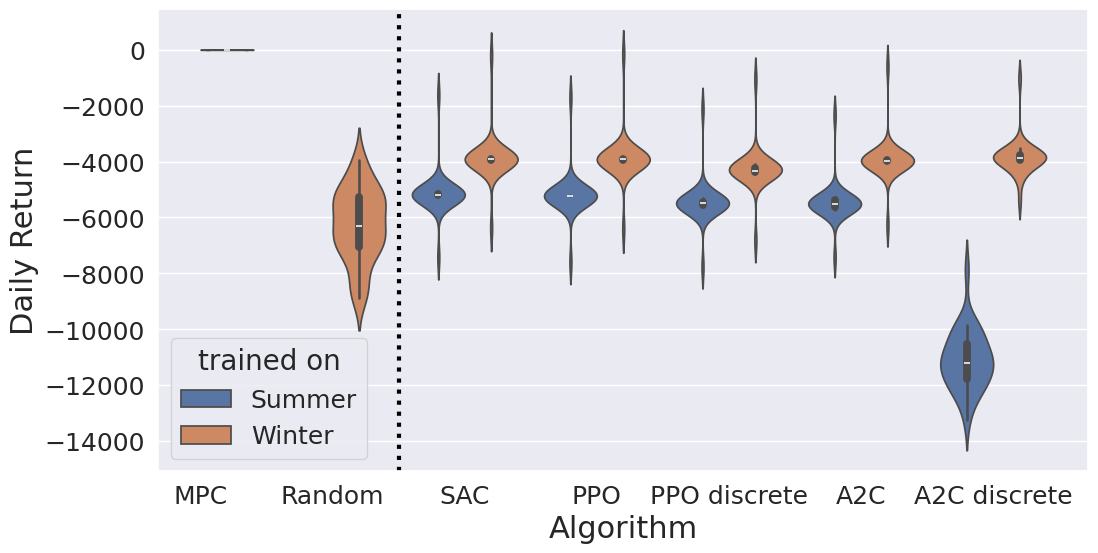

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="darkgrid")
a0 = np.array(rwlistsac).flatten()

a1 = np.array(rwlistppo).flatten()

a2 = np.array(rwlistppo_dc).flatten()

a3 = np.array(rwlista2c).flatten()

a4 = np.array(rwlista2c_dc).flatten()

a5 = np.array(rwlistmpc+rwlistmpc).flatten()

a6 = np.array(rwlistrandom+rwlistrandom).flatten()
df = pd.melt( pd.DataFrame( {"SAC":a0, "PPO":a1, "PPO discrete":a2,"A2C":a3,"A2C discrete":a4, "MPC":a5,"Random":a6}), var_name = 'Algorithm', value_name = 'Daily Return')

df=df.assign(Trained_On=(sacstr+sacstr+sacstr+sacstr+sacstr+mpcstr+mpcstr+randomstr+randomstr))
# fig = sns.violinplot(data = df, x = 'Algorithm', y = 'Daily Return', hue = 'Trained_On').get_figure()

# Set the figure size to be wider
plt.figure(figsize=(12, 6))

# Get the default seaborn color palette
default_palette = sns.color_palette()

# Manually specify colors for "Summer" and "Winter"
custom_palette = {
    'Summer': default_palette[0],  # Originally the color for Winter
    'Winter': default_palette[1],  # Originally the color for Summer
}

# Specify the desired order for 'Algorithm'
algorithm_order = ['MPC', 'Random', 'SAC', 'PPO', 'PPO discrete', 'A2C', 'A2C discrete']

# Create violinplot with custom hue and algorithm order
ax = sns.violinplot(data=df, x='Algorithm', y='Daily Return', hue='Trained_On',
                    palette=custom_palette, hue_order=['Summer', 'Winter'],
                    order=algorithm_order,density_norm='width')

# Set the labels and title with larger fonts
plt.xlabel('Algorithm', fontsize=22)
plt.ylabel('Daily Return', fontsize=22)

# Increase the fontsize for tick labels on x and y axes
plt.xticks(fontsize=18)  # Increase the fontsize to 20 for x-axis tick labels
plt.yticks(fontsize=18)  # Increase the fontsize to 20 for y-axis tick labels

# Get the handles and labels from the current legend
handles, labels = ax.get_legend_handles_labels()

# Create a mapping between labels and handles (useful for reordering)
label_handle_map = {label: handle for label, handle in zip(labels, handles)}

# Reorder the labels and handles in the desired order
ordered_labels = ['Summer', 'Winter']
ordered_handles = [label_handle_map[label] for label in ordered_labels]

# Set the updated legend
plt.legend(ordered_handles, ordered_labels, title='trained on', fontsize='18', title_fontsize='20', loc='lower left')

# Add a vertical line at x=1.5 to separate 'Random' and 'SAC' using large dotted markers
x_value = 1.5
y_range = ax.get_ylim()  # Get current y-axis limits for the specific Axes object
plt.plot([x_value, x_value], y_range, linestyle=':', color='black', linewidth=3)
ax.set_ylim(y_range)

# Save and show the figure
plt.savefig('BEAR/BuildingViolin.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
